# Reformat Vollmer et al. CFC-115 and CFC-13 AEFAS emissions for box model input 

In [1]:
from pathlib import Path
import shutil
import pandas as pd
import numpy as np

In [2]:
species_list= ["CFC-115"]

agage_dir = Path("/user/home/lw13938/work/py12box_agage/data/")
laube_dir = Path("/user/home/lw13938/work/py12box_laube/data/")
vollmer_dir = Path("/user/home/lw13938/work/py12box_laube/aux_data/")

col_names = [f"Ignore{i}" for i in range(13)] 
col_names[11] = "emissions"

for species in species_list:

    # Read existing
    df = pd.read_csv(agage_dir / f"{species}/inputs/{species}_emissions.csv", comment="#",
    index_col = 0)
    # dfnew = df.copy()

    # Read Vollmer et al. file
    dfv = pd.read_csv(vollmer_dir / "VollmerTableS9-AFEAS_Data.csv", comment="%", index_col=0,
    names=col_names)
    vemis = pd.DataFrame(index = dfv.index, data=dfv["emissions"].values/1e3) # In kt/Gg
    vemis = vemis.reindex(np.arange(1930, 2101).astype(int), fill_value=0.).rename_axis('Year')

    # Take weightings from other emissions file
    weight = df.divide(df.values.sum(1), axis=0).fillna(0)
    meanweights = weight.mean(0)
        
    for yr in range(len(weight.index)):
        if (weight.values[yr,:] == 0.).all() and vemis.values[yr] != 0.:
            weight.values[yr,:] = meanweights.values
    
    dfnew = weight.multiply(vemis.values)

    # # comment_string = f"# McCulloch et al (2007) emissions divided by {div} \n"
    # comment_string = f"# Emissions set to {val} Gg/yr \n"
    # comment_string += "# UNITS: Gg/yr \n"
    # with open(Path(laube_dir / f"{species}/inputs/{species}_emissions.csv"), 'w') as fout:
    #     fout.write(comment_string)
    #     df.to_csv(fout)

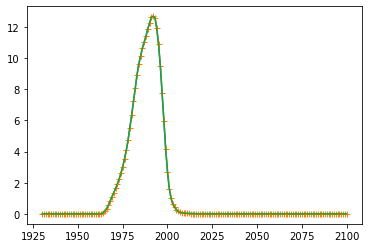

In [15]:
plt.plot(df.sum(1))
plt.plot(vemis, "+")
plt.plot(dfnew.sum(1))



In [5]:
11.25 + np.cumsum([22.5,22.5,22.5])

array([33.75, 56.25, 78.75])

In [3]:
import numpy as np